In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

DATA LOADING

In [2]:
df=pd.read_csv('consumer_electronics_sales_data.csv')
df_copy=df.copy()

In [3]:
df.shape

(9000, 9)

In [4]:
df.sample(5)

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
7807,13681,Smart Watches,HP,2153.249371,41,0,5,5,1
2513,8387,Smart Watches,HP,682.537486,60,1,11,1,1
6364,12238,Smartphones,Samsung,1998.713529,26,1,12,2,0
7819,13693,Laptops,Other Brands,904.753996,31,1,13,3,1
3323,9197,Laptops,Samsung,1801.891549,21,0,13,5,0


Male = 0 and Female = 1
PurchaseFrequency is average number of sales per year
CustomerSatisfaction is rating out of five
Purchase Intent : 1 for buying 

In [5]:
df_copy.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0


DATA INFORMATION

In [6]:
df.info

<bound method DataFrame.info of       ProductID ProductCategory  ProductBrand  ProductPrice  CustomerAge  \
0          5874     Smartphones  Other Brands    312.949668           18   
1          5875   Smart Watches       Samsung    980.389404           35   
2          5876         Tablets       Samsung   2606.718293           63   
3          5877     Smartphones       Samsung    870.395450           63   
4          5878         Tablets          Sony   1798.955875           57   
...         ...             ...           ...           ...          ...   
8995      14869   Smart Watches       Samsung   1041.149163           36   
8996      14870     Smartphones       Samsung   1485.694311           57   
8997      14871      Headphones       Samsung   2887.369597           28   
8998      14872         Tablets            HP   1490.453964           38   
8999      14873     Smartphones          Sony   2315.583087           62   

      CustomerGender  PurchaseFrequency  CustomerSatisf

DATA CLEANING

In [7]:
df['ProductPrice']=df['ProductPrice'].astype(str)
#df['ProductPrice']=df['ProductPrice'].str.replace(".","")

MISSING VALUES

In [8]:
df.isna().sum()

ProductID               0
ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

DUPLICATES

In [9]:
df.duplicated().sum()

0

EXPLORATORY DATA ANALYSIS

1.UNIQUE VALUES IN EACH COLUMN

In [10]:
df.nunique()

ProductID               9000
ProductCategory            5
ProductBrand               5
ProductPrice            9000
CustomerAge               52
CustomerGender             2
PurchaseFrequency         19
CustomerSatisfaction       5
PurchaseIntent             2
dtype: int64

2.DATA TYPES

In [11]:
df.dtypes

ProductID                int64
ProductCategory         object
ProductBrand            object
ProductPrice            object
CustomerAge              int64
CustomerGender           int64
PurchaseFrequency        int64
CustomerSatisfaction     int64
PurchaseIntent           int64
dtype: object

In [12]:
df['CustomerAge']=df['CustomerAge'].astype(float)
df['ProductID']=df['ProductID'].astype(str)
df['ProductPrice']=df['ProductPrice'].astype(float)
df['CustomerGender']=df['CustomerGender'].astype(str)
df['PurchaseFrequency']=df['PurchaseFrequency'].astype(float)
df['CustomerSatisfaction']=df['CustomerSatisfaction'].astype(float)
df['PurchaseIntent']=df['PurchaseIntent'].astype(float)

In [13]:
df.dtypes

ProductID                object
ProductCategory          object
ProductBrand             object
ProductPrice            float64
CustomerAge             float64
CustomerGender           object
PurchaseFrequency       float64
CustomerSatisfaction    float64
PurchaseIntent          float64
dtype: object

In [14]:
df.head()

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18.0,0,2.0,1.0,0.0
1,5875,Smart Watches,Samsung,980.389404,35.0,1,7.0,2.0,1.0
2,5876,Tablets,Samsung,2606.718293,63.0,0,1.0,5.0,1.0
3,5877,Smartphones,Samsung,870.395450,63.0,1,10.0,3.0,1.0
4,5878,Tablets,Sony,1798.955875,57.0,0,17.0,3.0,0.0


In [15]:
df.rename(columns={"CustomerSatisfaction" : "rating"},inplace=True)

In [16]:
df.drop("ProductID",axis=1,inplace=True)

In [17]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,rating,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18.0,0,2.0,1.0,0.0
1,Smart Watches,Samsung,980.389404,35.0,1,7.0,2.0,1.0
2,Tablets,Samsung,2606.718293,63.0,0,1.0,5.0,1.0
3,Smartphones,Samsung,870.395450,63.0,1,10.0,3.0,1.0
4,Tablets,Sony,1798.955875,57.0,0,17.0,3.0,0.0


UNIVARIATE ANALYSIS

In [18]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,rating,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18.0,0,2.0,1.0,0.0
1,Smart Watches,Samsung,980.389404,35.0,1,7.0,2.0,1.0
2,Tablets,Samsung,2606.718293,63.0,0,1.0,5.0,1.0
3,Smartphones,Samsung,870.395450,63.0,1,10.0,3.0,1.0
4,Tablets,Sony,1798.955875,57.0,0,17.0,3.0,0.0


In [19]:
df.describe()

,ProductPrice,CustomerAge,PurchaseFrequency,rating,PurchaseIntent
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,1527.429195,43.347000,10.054667,2.996000,0.566444
std,829.900898,15.055084,5.461328,1.405301,0.495593
min,100.376358,18.000000,1.000000,1.000000,0.000000
25%,809.165014,30.000000,5.000000,2.000000,0.000000
50%,1513.024577,43.000000,10.000000,3.000000,1.000000
75%,2244.415520,56.000000,15.000000,4.000000,1.000000
max,2999.852253,69.000000,19.000000,5.000000,1.000000


DESCRIPTIVE ANALYSIS

In [20]:
df["ProductCategory"].value_counts()

ProductCategory
Laptops          1842
Smartphones      1841
Smart Watches    1810
Tablets          1769
Headphones       1738
Name: count, dtype: int64

In [21]:
df["ProductBrand"].value_counts()

ProductBrand
Samsung         1854
HP              1820
Sony            1790
Other Brands    1776
Apple           1760
Name: count, dtype: int64

In [22]:
df["CustomerAge"].value_counts().head(10)

CustomerAge
21.0    197
31.0    196
23.0    195
62.0    194
58.0    192
57.0    189
45.0    188
43.0    188
30.0    187
20.0    187
Name: count, dtype: int64

In [23]:
df["rating"].value_counts().sort_values(ascending=False)

rating
3.0    1848
2.0    1814
4.0    1798
1.0    1775
5.0    1765
Name: count, dtype: int64

In [24]:
df["CustomerGender"].value_counts()

CustomerGender
1    4580
0    4420
Name: count, dtype: int64

DISTRIBUTION OF COLUMNS

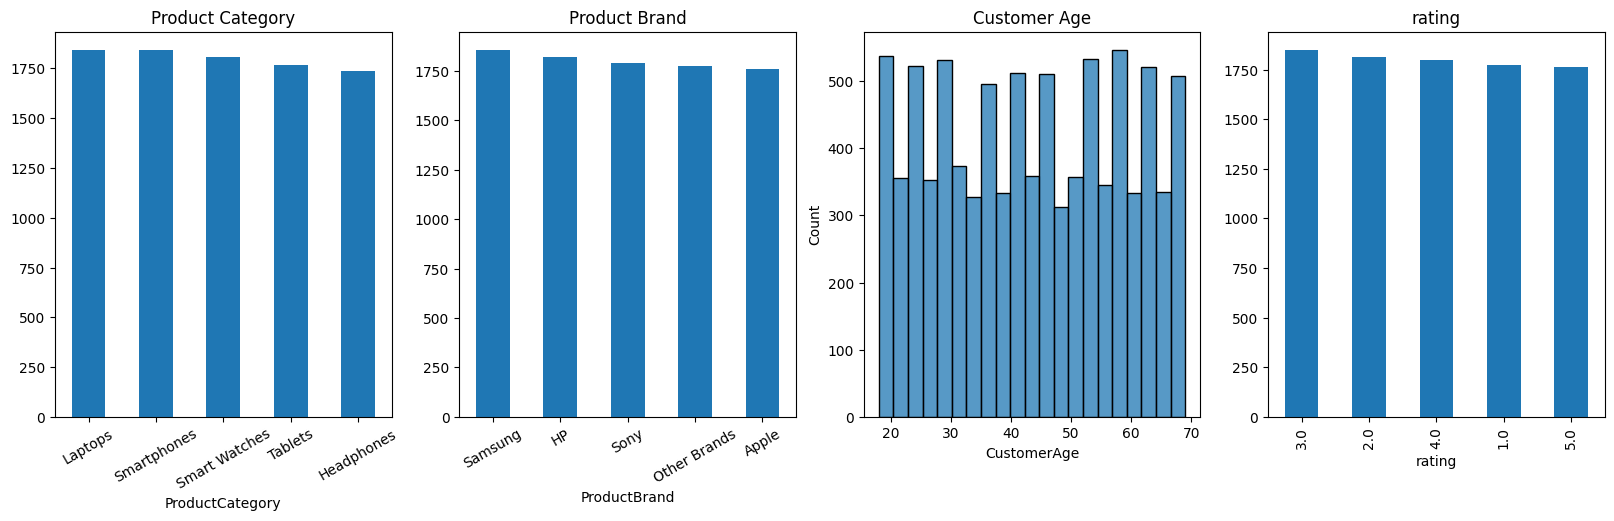

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
prod=df["ProductCategory"].value_counts().plot(kind="bar")
prod.set_xticklabels(prod.get_xticklabels(),rotation =30)
plt.title("Product Category")
plt.subplot(1,4,2)
brand=df["ProductBrand"].value_counts().plot(kind="bar")
brand.set_xticklabels(brand.get_xticklabels(),rotation =30)
plt.title("Product Brand")
plt.subplot(1,4,3)
sns.histplot(x="CustomerAge",data=df)
plt.title("Customer Age")
plt.subplot(1,4,4)
df["rating"].value_counts().plot(kind="bar")
plt.title("rating")
plt.show()

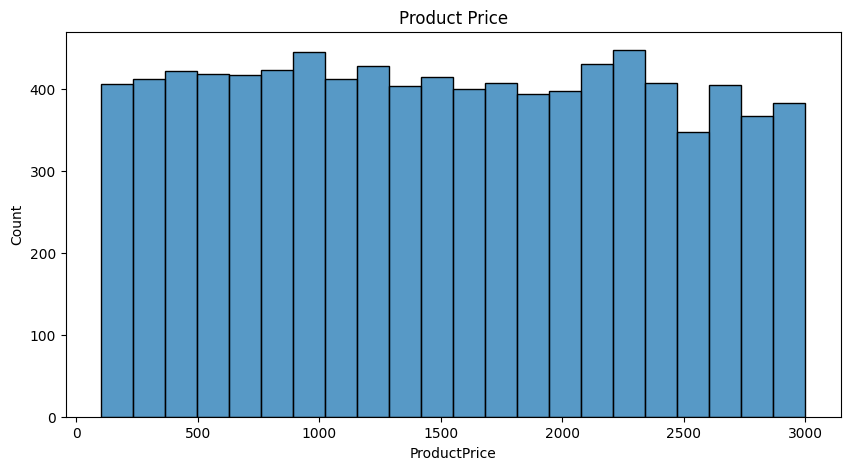

In [26]:
plt.figure(figsize=(10,5))
#plt.subplot(1,1,1)
sns.histplot(x="ProductPrice",data=df)
plt.title("Product Price")
plt.show()

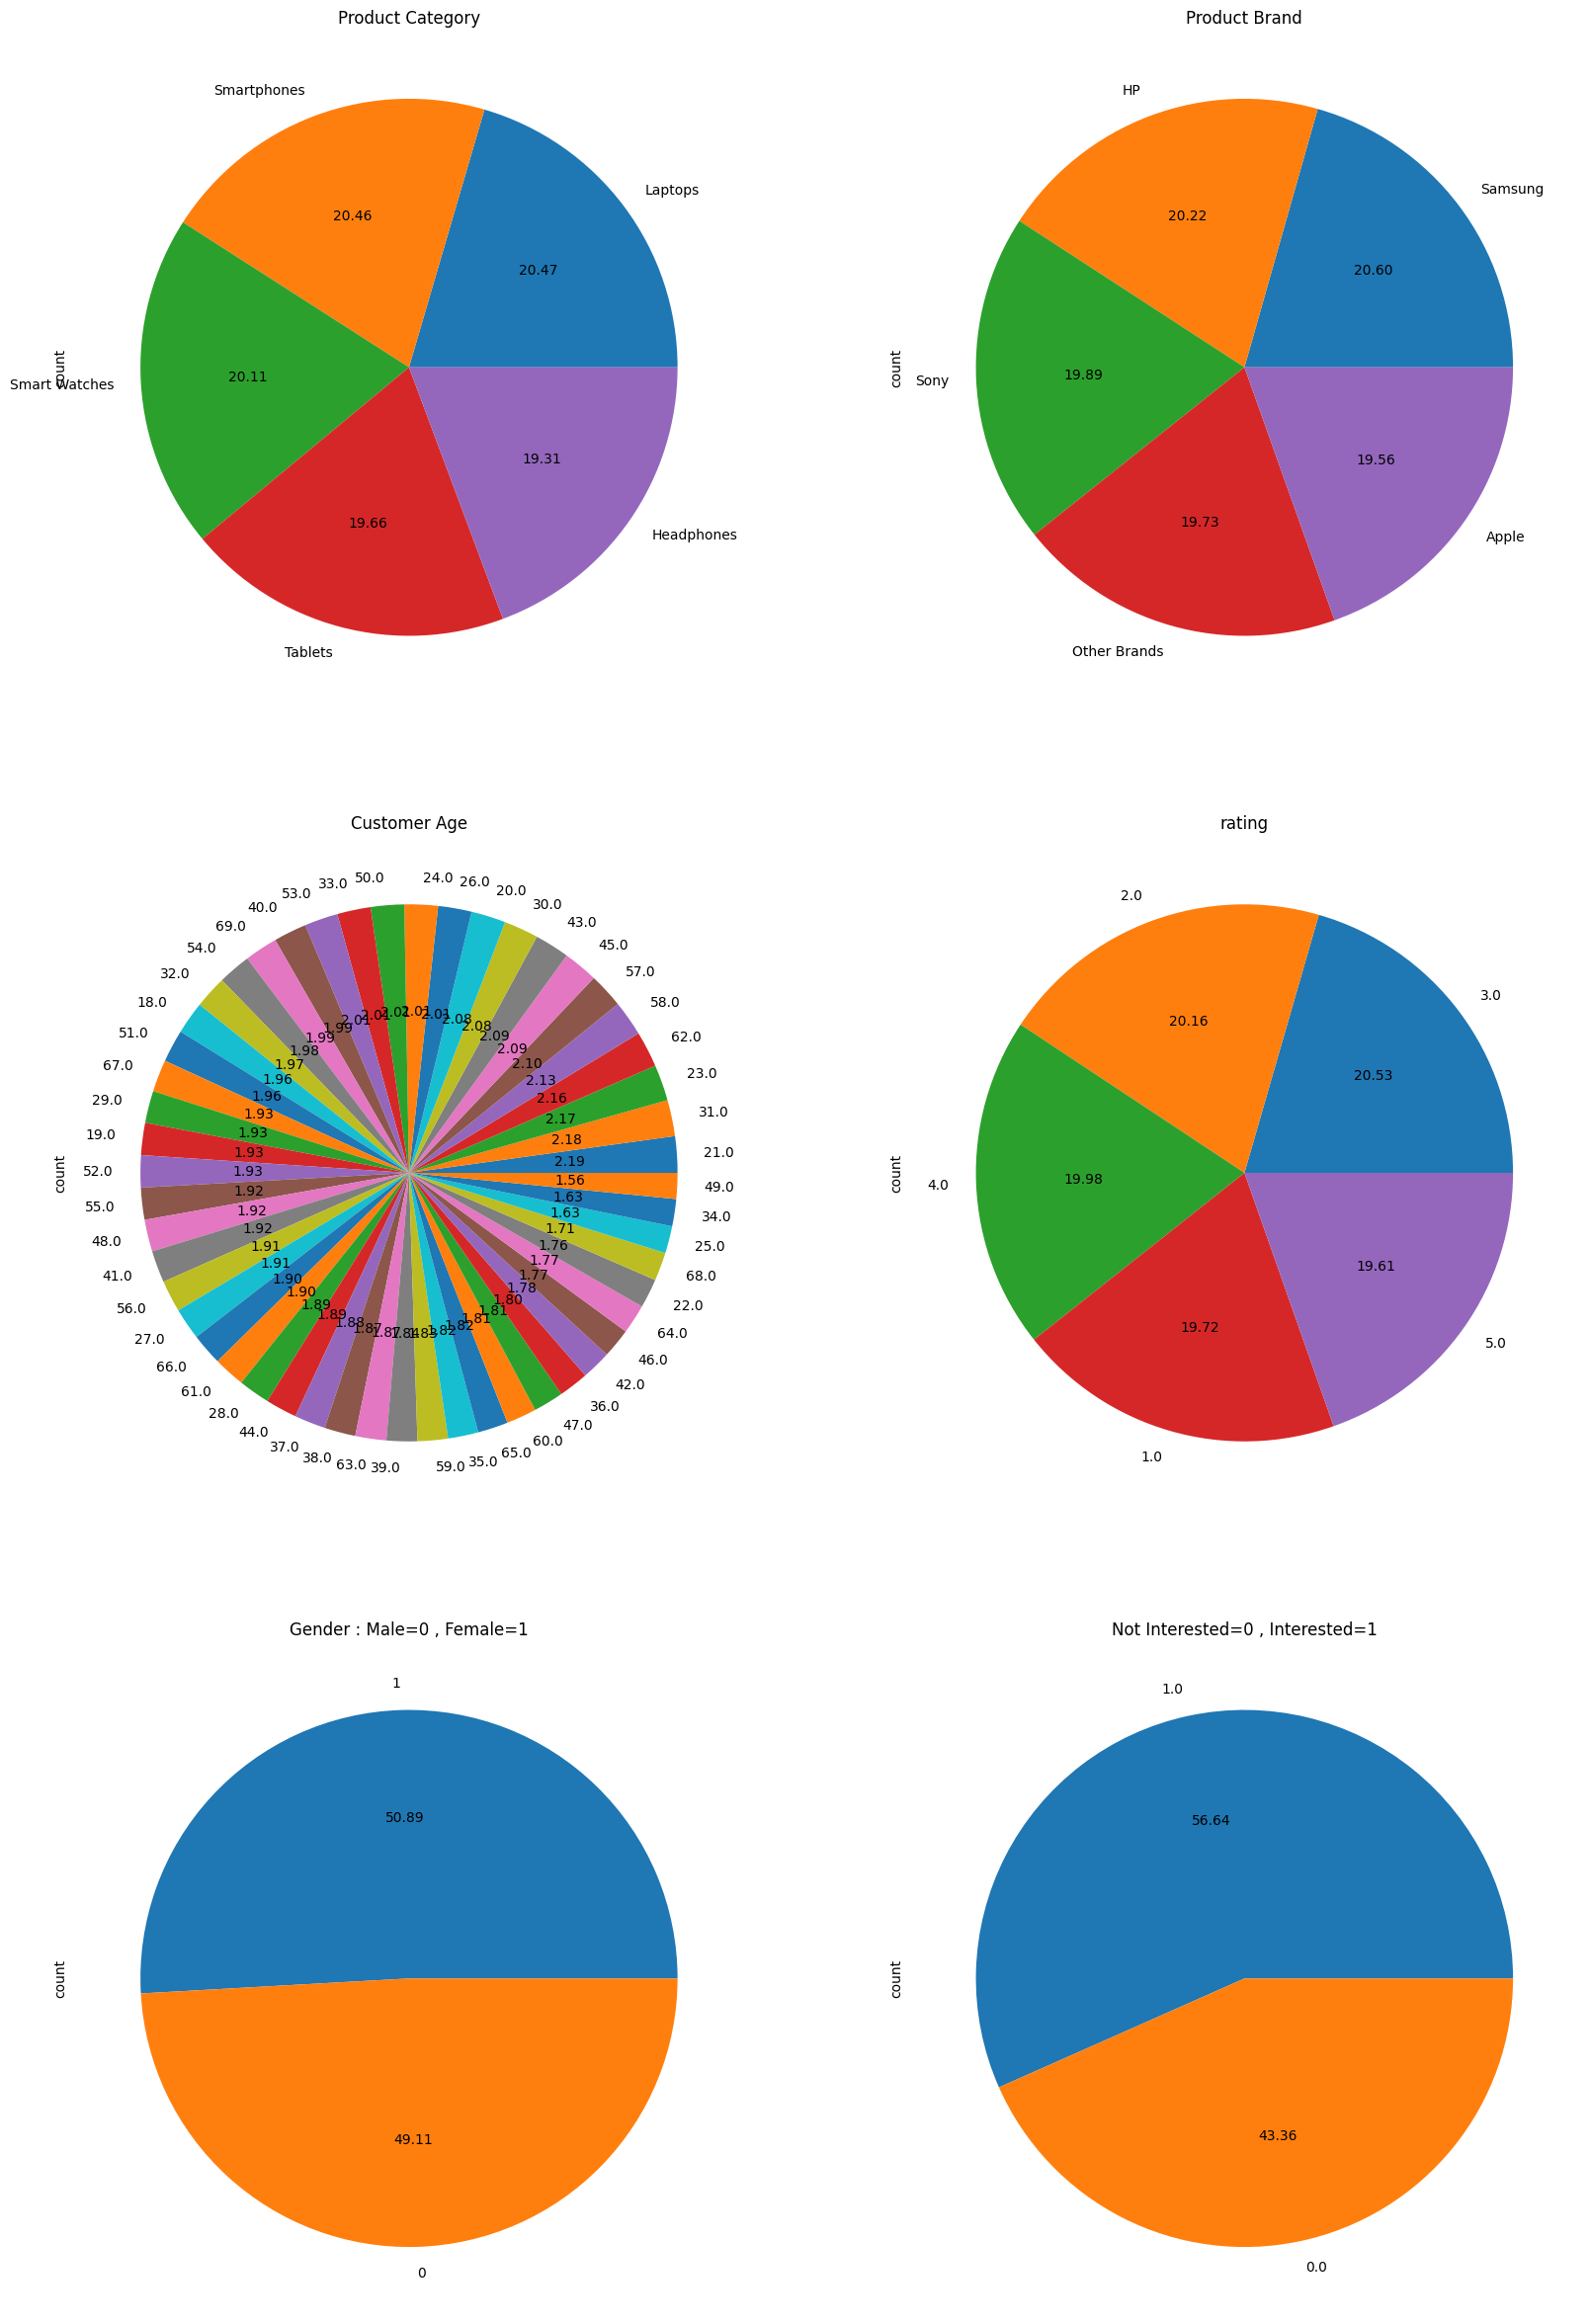

In [27]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
df["ProductCategory"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Product Category")
plt.subplot(3,2,2)
df["ProductBrand"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Product Brand")
plt.subplot(3,2,3)
df["CustomerAge"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Customer Age")
plt.subplot(3,2,4)
df["rating"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("rating")
plt.subplot(3,2,5)
df["CustomerGender"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Gender : Male=0 , Female=1")
plt.subplot(3,2,6)
df["PurchaseIntent"].value_counts().plot(kind="pie",autopct="%.2f")
plt.title("Not Interested=0 , Interested=1")
plt.show()

SKEWNESS

C:\Users\nania\AppData\Local\Temp\ipykernel_4488\1403326851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["ProductPrice"])
C:\Users\nania\AppData\Local\Temp\ipykernel_4488\1403326851.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CustomerAge'])
C:\Users\nania\AppData\Local\Temp

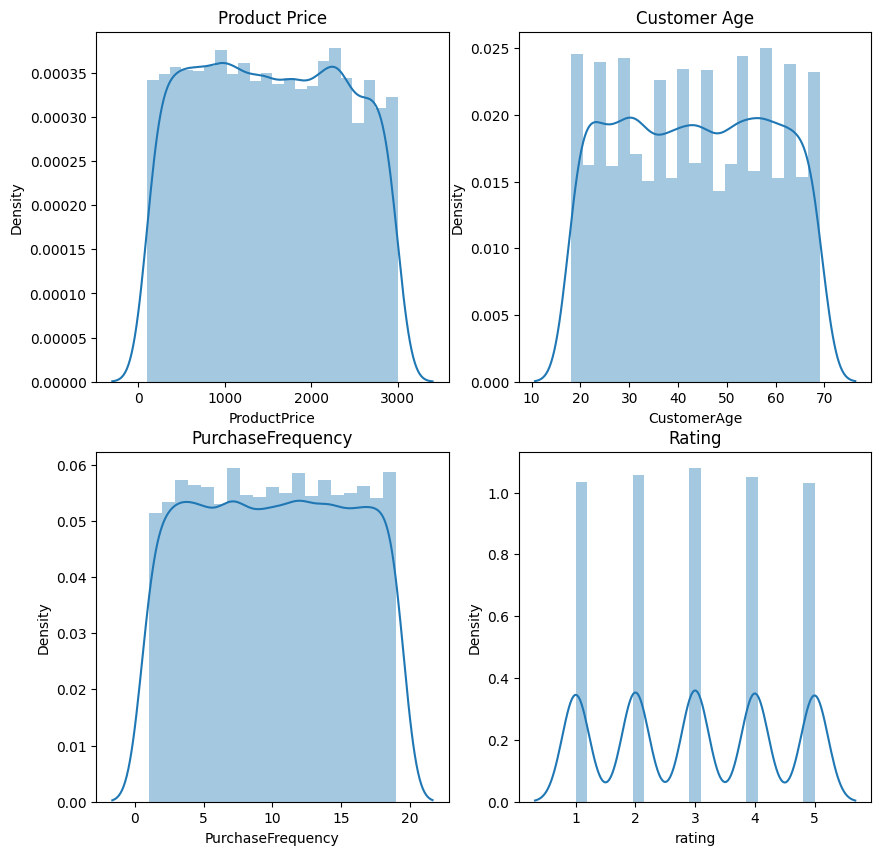

In [28]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["ProductPrice"])
plt.title("Product Price")
plt.subplot(2,2,2)
sns.distplot(df['CustomerAge'])
plt.title("Customer Age")
plt.subplot(2,2,3)
sns.distplot(df["PurchaseFrequency"])
plt.title("PurchaseFrequency")
plt.subplot(2,2,4)
sns.distplot(df['rating'])
plt.title("Rating")
plt.show()

OUTLINERS

In [29]:
mean_price=df["ProductPrice"].mean()
std_price=df["ProductPrice"].std()
print("ProductPrice :")
print("mean = ",mean_price,"\nstandard deviation = ",std_price)
mean_age=df["CustomerAge"].mean()
std_age=df["CustomerAge"].std()
print("CustomerAge :")
print("mean = ",mean_age,"\nstandard deviation = ",std_age)
mean_frequency=df["PurchaseFrequency"].mean()
std_frequency=df["PurchaseFrequency"].std()
print("PurchaseFrequency :")
print("mean = ",mean_frequency,"\nstandard deviation = ",std_frequency)

ProductPrice :
mean =  1527.4291946773735 
standard deviation =  829.9008980338327
CustomerAge :
mean =  43.347 
standard deviation =  15.055083949552753
PurchaseFrequency :
mean =  10.054666666666666 
standard deviation =  5.461327983633293


In [30]:
print("ProductPrice :")
print("lowest allowable value : ",(mean_price-(3*std_price)))
print("Highest allowable value : ",(mean_price+(3*std_price)))
print("CustomerAge :")
print("lowest allowable value : ",(mean_age-(3*std_age)))
print("Highest allowable value : ",(mean_age+(3*std_age)))
print("PurchaseFrequency :")
print("lowest allowable value : ",(mean_frequency-(3*std_frequency)))
print("Highest allowable value : ",(mean_frequency+(3*std_frequency)))

ProductPrice :
lowest allowable value :  -962.2734994241248
Highest allowable value :  4017.131888778872
CustomerAge :
lowest allowable value :  -1.8182518486582566
Highest allowable value :  88.51225184865825
PurchaseFrequency :
lowest allowable value :  -6.329317284233213
Highest allowable value :  26.438650617566545


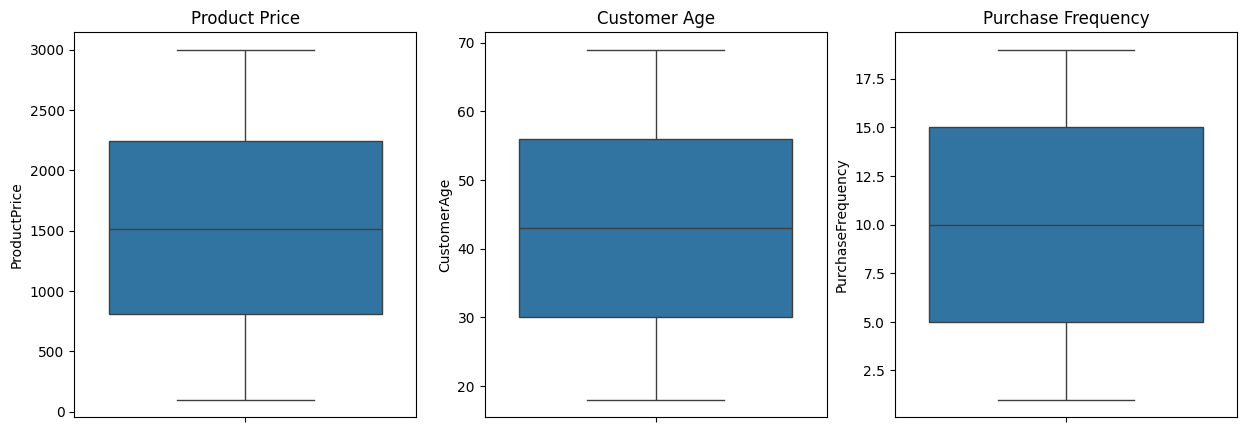

In [31]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(df["ProductPrice"])
plt.title("Product Price")
plt.subplot(1,3,2)
sns.boxplot(df["CustomerAge"])
plt.title("Customer Age")
plt.subplot(1,3,3)
sns.boxplot(df["PurchaseFrequency"])
plt.title("Purchase Frequency")
plt.show()

NO OUTLINERS

BIVARIATE ANALYSIS

In [32]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,rating,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18.0,0,2.0,1.0,0.0
1,Smart Watches,Samsung,980.389404,35.0,1,7.0,2.0,1.0
2,Tablets,Samsung,2606.718293,63.0,0,1.0,5.0,1.0
3,Smartphones,Samsung,870.395450,63.0,1,10.0,3.0,1.0
4,Tablets,Sony,1798.955875,57.0,0,17.0,3.0,0.0


PRODUCT CATEGORY w.r.t PRODUCT PRICE

In [33]:
df[["ProductCategory","ProductBrand","ProductPrice"]].set_index("ProductCategory").sample(10)

,ProductBrand,ProductPrice
ProductCategory,,
Laptops,Sony,2160.836729
Smartphones,Apple,2896.385702
Smart Watches,Apple,527.419396
Smart Watches,Sony,2237.780384
Smartphones,HP,899.428365
Smartphones,Samsung,138.740269
Smart Watches,Other Brands,2817.250699
Smart Watches,Apple,435.163966
Smartphones,Samsung,352.905071


C:\Users\nania\AppData\Local\Temp\ipykernel_4488\1738162348.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'Smartphones'),
 Text(1, 0, 'Smart Watches'),
 Text(2, 0, 'Tablets'),
 Text(3, 0, 'Laptops'),
 Text(4, 0, 'Headphones')]

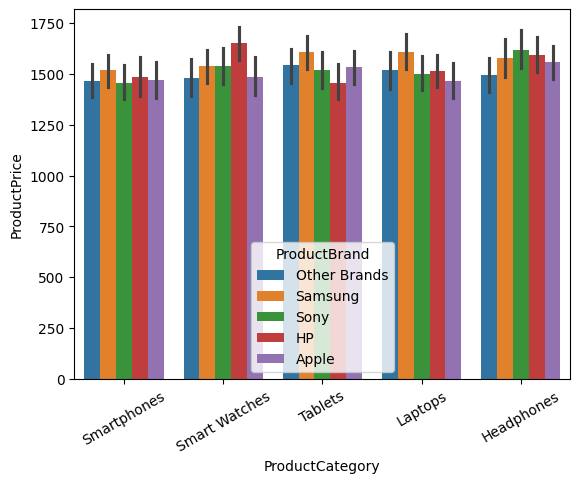

In [34]:
ax=sns.barplot(x="ProductCategory",y="ProductPrice",hue="ProductBrand",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

PRODUCT CATEGORY w.r.t CUSTOMER AGE

In [35]:
df[["ProductCategory","ProductBrand","CustomerAge"]].set_index("ProductCategory").sample(10)

,ProductBrand,CustomerAge
ProductCategory,,
Laptops,Sony,64.0
Tablets,Sony,30.0
Tablets,Samsung,39.0
Headphones,Other Brands,62.0
Smart Watches,Samsung,53.0
Headphones,Sony,65.0
Headphones,Samsung,69.0
Headphones,HP,69.0
Tablets,Apple,28.0


C:\Users\nania\AppData\Local\Temp\ipykernel_4488\4169651960.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'Smartphones'),
 Text(1, 0, 'Smart Watches'),
 Text(2, 0, 'Tablets'),
 Text(3, 0, 'Laptops'),
 Text(4, 0, 'Headphones')]

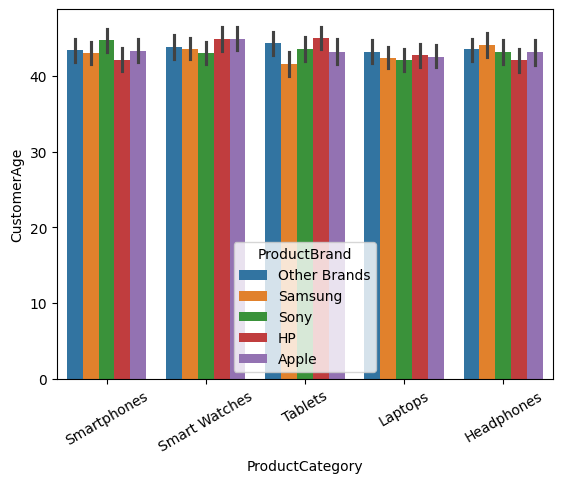

In [36]:
ax=sns.barplot(x="ProductCategory",y="CustomerAge",hue="ProductBrand",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

PRODUCT CATEGORY w.r.t RATING

In [37]:
df[["ProductCategory","ProductBrand","rating"]].set_index("ProductCategory").sample(10)

,ProductBrand,rating
ProductCategory,,
Laptops,Other Brands,2.0
Smart Watches,HP,3.0
Headphones,Sony,5.0
Laptops,HP,3.0
Smart Watches,Apple,5.0
Smart Watches,Samsung,2.0
Smart Watches,Apple,2.0
Tablets,HP,3.0
Tablets,Apple,4.0


C:\Users\nania\AppData\Local\Temp\ipykernel_4488\2136677230.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'Smartphones'),
 Text(1, 0, 'Smart Watches'),
 Text(2, 0, 'Tablets'),
 Text(3, 0, 'Laptops'),
 Text(4, 0, 'Headphones')]

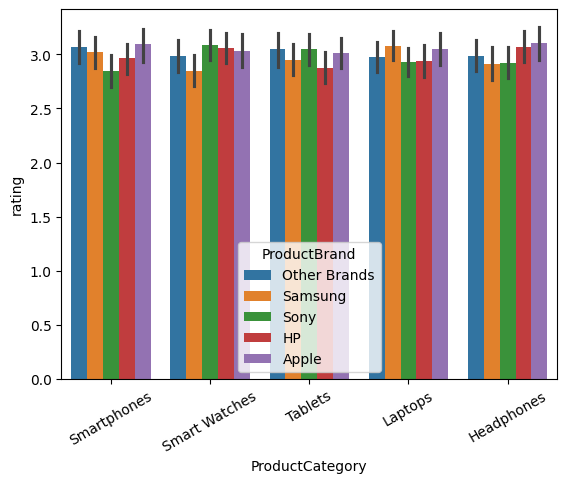

In [38]:
ax=sns.barplot(x="ProductCategory",y="rating",hue="ProductBrand",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

PRODUCT CATEGORY w.r.t PURCHASE FREQUENCY

In [39]:
df[["ProductCategory","ProductBrand","PurchaseFrequency"]].set_index("ProductCategory").sample(10)

,ProductBrand,PurchaseFrequency
ProductCategory,,
Headphones,Samsung,14.0
Headphones,Samsung,19.0
Smartphones,Other Brands,12.0
Headphones,Apple,19.0
Smartphones,Other Brands,15.0
Headphones,Sony,5.0
Laptops,Samsung,19.0
Smart Watches,Samsung,12.0
Tablets,HP,18.0


C:\Users\nania\AppData\Local\Temp\ipykernel_4488\483202128.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'Smartphones'),
 Text(1, 0, 'Smart Watches'),
 Text(2, 0, 'Tablets'),
 Text(3, 0, 'Laptops'),
 Text(4, 0, 'Headphones')]

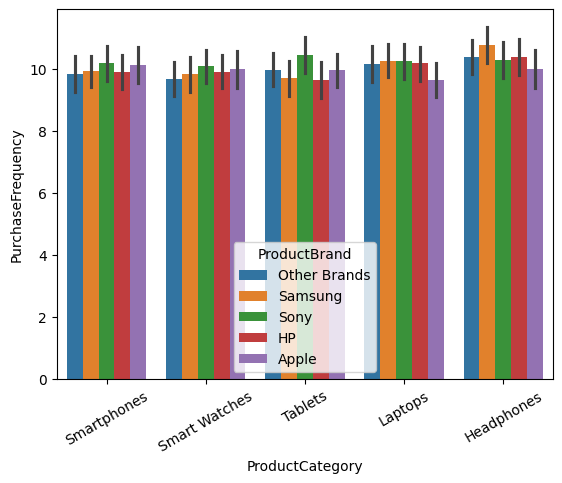

In [40]:
ax=sns.barplot(x="ProductCategory",y="PurchaseFrequency",hue="ProductBrand",data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

PURCHASE INTENT w.r.t CUSTOMER AGE

In [41]:
df[["CustomerAge","PurchaseIntent"]].set_index("CustomerAge").sample(10)

,PurchaseIntent
CustomerAge,
62.0,0.0
31.0,1.0
37.0,1.0
29.0,1.0
28.0,0.0
45.0,0.0
26.0,0.0
44.0,1.0
41.0,1.0


<Axes: xlabel='CustomerAge', ylabel='PurchaseIntent'>

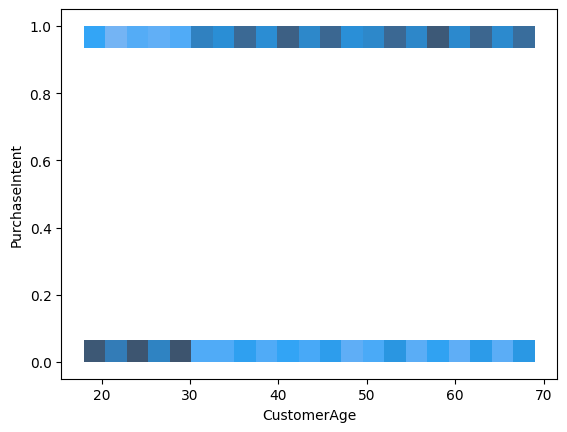

In [42]:
sns.histplot(x="CustomerAge",y="PurchaseIntent",data=df)

PURCHASE INTENT w.r.t RATING

In [43]:
df[["rating","PurchaseIntent"]].set_index("rating").sample(10)

,PurchaseIntent
rating,
5.0,1.0
1.0,0.0
5.0,1.0
5.0,1.0
4.0,1.0
3.0,0.0
3.0,0.0
2.0,0.0
4.0,1.0


<Axes: xlabel='rating', ylabel='PurchaseIntent'>

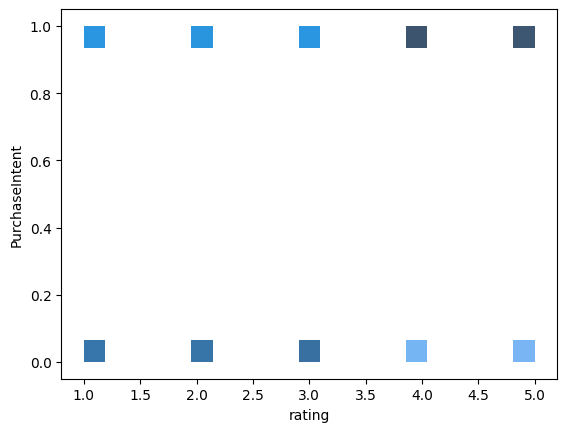

In [44]:
sns.histplot(x="rating",y="PurchaseIntent",data=df)

In [45]:
df

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,rating,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18.0,0,2.0,1.0,0.0
1,Smart Watches,Samsung,980.389404,35.0,1,7.0,2.0,1.0
2,Tablets,Samsung,2606.718293,63.0,0,1.0,5.0,1.0
3,Smartphones,Samsung,870.395450,63.0,1,10.0,3.0,1.0
4,Tablets,Sony,1798.955875,57.0,0,17.0,3.0,0.0
...,...,...,...,...,...,...,...,...
8995,Smart Watches,Samsung,1041.149163,36.0,1,16.0,4.0,0.0
8996,Smartphones,Samsung,1485.694311,57.0,0,5.0,1.0,1.0
8997,Headphones,Samsung,2887.369597,28.0,0,18.0,4.0,0.0
8998,Tablets,HP,1490.453964,38.0,0,4.0,2.0,1.0


In [46]:
df_brand=df[['ProductBrand','ProductPrice']].copy()
df_brand.head(10)

,ProductBrand,ProductPrice
0,Other Brands,312.949668
1,Samsung,980.389404
2,Samsung,2606.718293
3,Samsung,870.395450
4,Sony,1798.955875
5,Samsung,373.148325
6,Samsung,2330.036775
7,HP,780.101494
8,Other Brands,2264.561583
9,HP,1001.624006


In [47]:
df_brand.groupby('ProductBrand').sum().sort_values('ProductPrice',ascending=False)

,ProductPrice
ProductBrand,
Samsung,2.907674e+06
HP,2.802751e+06
Sony,2.729179e+06
Other Brands,2.662858e+06
Apple,2.644401e+06


In [48]:
df_category=df[['ProductCategory','ProductPrice']].copy()
df_category.head(10)

,ProductCategory,ProductPrice
0,Smartphones,312.949668
1,Smart Watches,980.389404
2,Tablets,2606.718293
3,Smartphones,870.395450
4,Tablets,1798.955875
5,Smartphones,373.148325
6,Smartphones,2330.036775
7,Smartphones,780.101494
8,Laptops,2264.561583
9,Laptops,1001.624006


In [49]:
df_category.groupby('ProductCategory').sum().sort_values('ProductPrice',ascending=False)

,ProductPrice
ProductCategory,
Laptops,2.804346e+06
Smart Watches,2.785468e+06
Headphones,2.723817e+06
Smartphones,2.723393e+06
Tablets,2.709839e+06


<Axes: xlabel='PurchaseIntent', ylabel='PurchaseFrequency'>

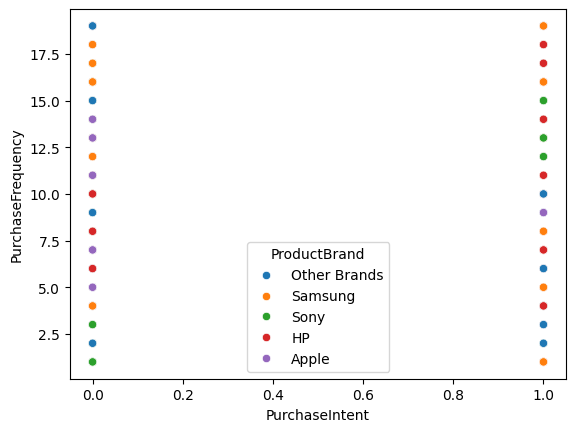

In [50]:
sns.scatterplot(x="PurchaseIntent",y="PurchaseFrequency",data=df,hue="ProductBrand")

CORELATION

In [51]:
df_corr=df
df_corr.drop("ProductCategory",axis=1,inplace=True)
df_corr.drop("ProductBrand",axis=1,inplace=True)
df_corr.corr()

,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,rating,PurchaseIntent
ProductPrice,1.000000,-0.009322,0.001835,0.009281,0.002112,-0.017512
CustomerAge,-0.009322,1.000000,-0.010767,0.005746,0.003753,0.289798
CustomerGender,0.001835,-0.010767,1.000000,-0.008643,0.007959,0.504412
PurchaseFrequency,0.009281,0.005746,-0.008643,1.000000,0.020603,-0.001465
rating,0.002112,0.003753,0.007959,0.020603,1.000000,0.391133
PurchaseIntent,-0.017512,0.289798,0.504412,-0.001465,0.391133,1.000000


HEATMAP

<Axes: >

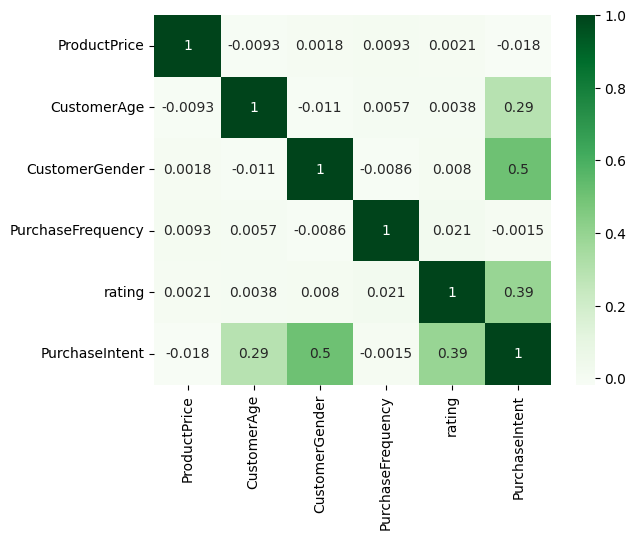

In [53]:
sns.heatmap(df_corr.corr(),annot=True,cmap="Greens")

MACHINE LEARNING MODEL